<a href="https://colab.research.google.com/github/kholbyjack/Community-Wellness-Screening/blob/main/Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🩺 Community Wellness Screening — EDA Project by Kaitlyn Holbert

**Tools allowed:** `pandas`, `numpy`, `matplotlib` only. (*No seaborn, no sklearn.*)

**Datasets Locations and Names:** Canvas -> Modules -> Week 3 -> Datasets -> `community_wellness_screening.csv`.


## 📖 Dataset Overview (Read First)

Each row is one participant's anonymized intake measurement:

- **Panel_A** — Number of prior health checkups
- **Panel_B** — Blood sugar index (fasting)
- **Panel_C** — Circulatory pressure measurement
- **Panel_D** — Tissue thickness measure
- **Panel_E** — Metabolic enzyme indicator
- **Panel_F** — Body index derived from weight & height
- **Panel_G** — Risk factor score (family + lifestyle)
- **Panel_H** — Screening age (years)
- **ConditionFlag** — 1 = condition present, 0 = not present

> This project is **descriptive analysis**, not prediction.


## 0) Load the dataset

**Upload the CSV file**


In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Note for grader: need to upload community_wellness_screening.csv to session storage for this to work
wellness = pd.read_csv("sample_data/community_wellness_screening.csv")


## 1) Cleaning

- Check and handle duplicates.
- Decide on missing value strategies.
- Convert data types if needed.


In [ ]:
# Handling duplicates
print('***Info Before Cleaning***')
wellness.info()
print()
# wellness.describe()
wellness.drop_duplicates()

# Missing values strategies
# missing values found in PANEL_E, 16 people did not have anything for metabolic enzyme indicator
# Mean imputation used to complete data set to avoid bias from deleting data
new_e = wellness["Panel_E"].fillna(wellness["Panel_E"].mean())
wellness["Panel_E"] = new_e

print('***Info After Cleaning***')
wellness.info()
print()

print('***First Five Rows***')
print(wellness.head(5))

# There are no non-numeric values

***Info Before Cleaning***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Panel_A        768 non-null    int64  
 1   Panel_B        768 non-null    int64  
 2   Panel_C        768 non-null    float64
 3   Panel_D        768 non-null    int64  
 4   Panel_E        752 non-null    float64
 5   Panel_F        768 non-null    int64  
 6   Panel_G        768 non-null    float64
 7   Panel_H        768 non-null    int64  
 8   ConditionFlag  768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB

***Info After Cleaning***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Panel_A        768 non-null    int64  
 1   Panel_B        768 non-null    int64  
 2   Panel_C        768 non


## 2) EDA
Complete all items:
- **Univariate**: ≥2 histograms, ≥1 boxplot (with brief insights)
- **Bivariate**: ≥2 scatterplots (with brief insights)
- **Grouping**: ≥1 grouped summary (e.g., by `Age_Group`)
- **Correlation**: numeric correlation matrix + heatmap (matplotlib only)


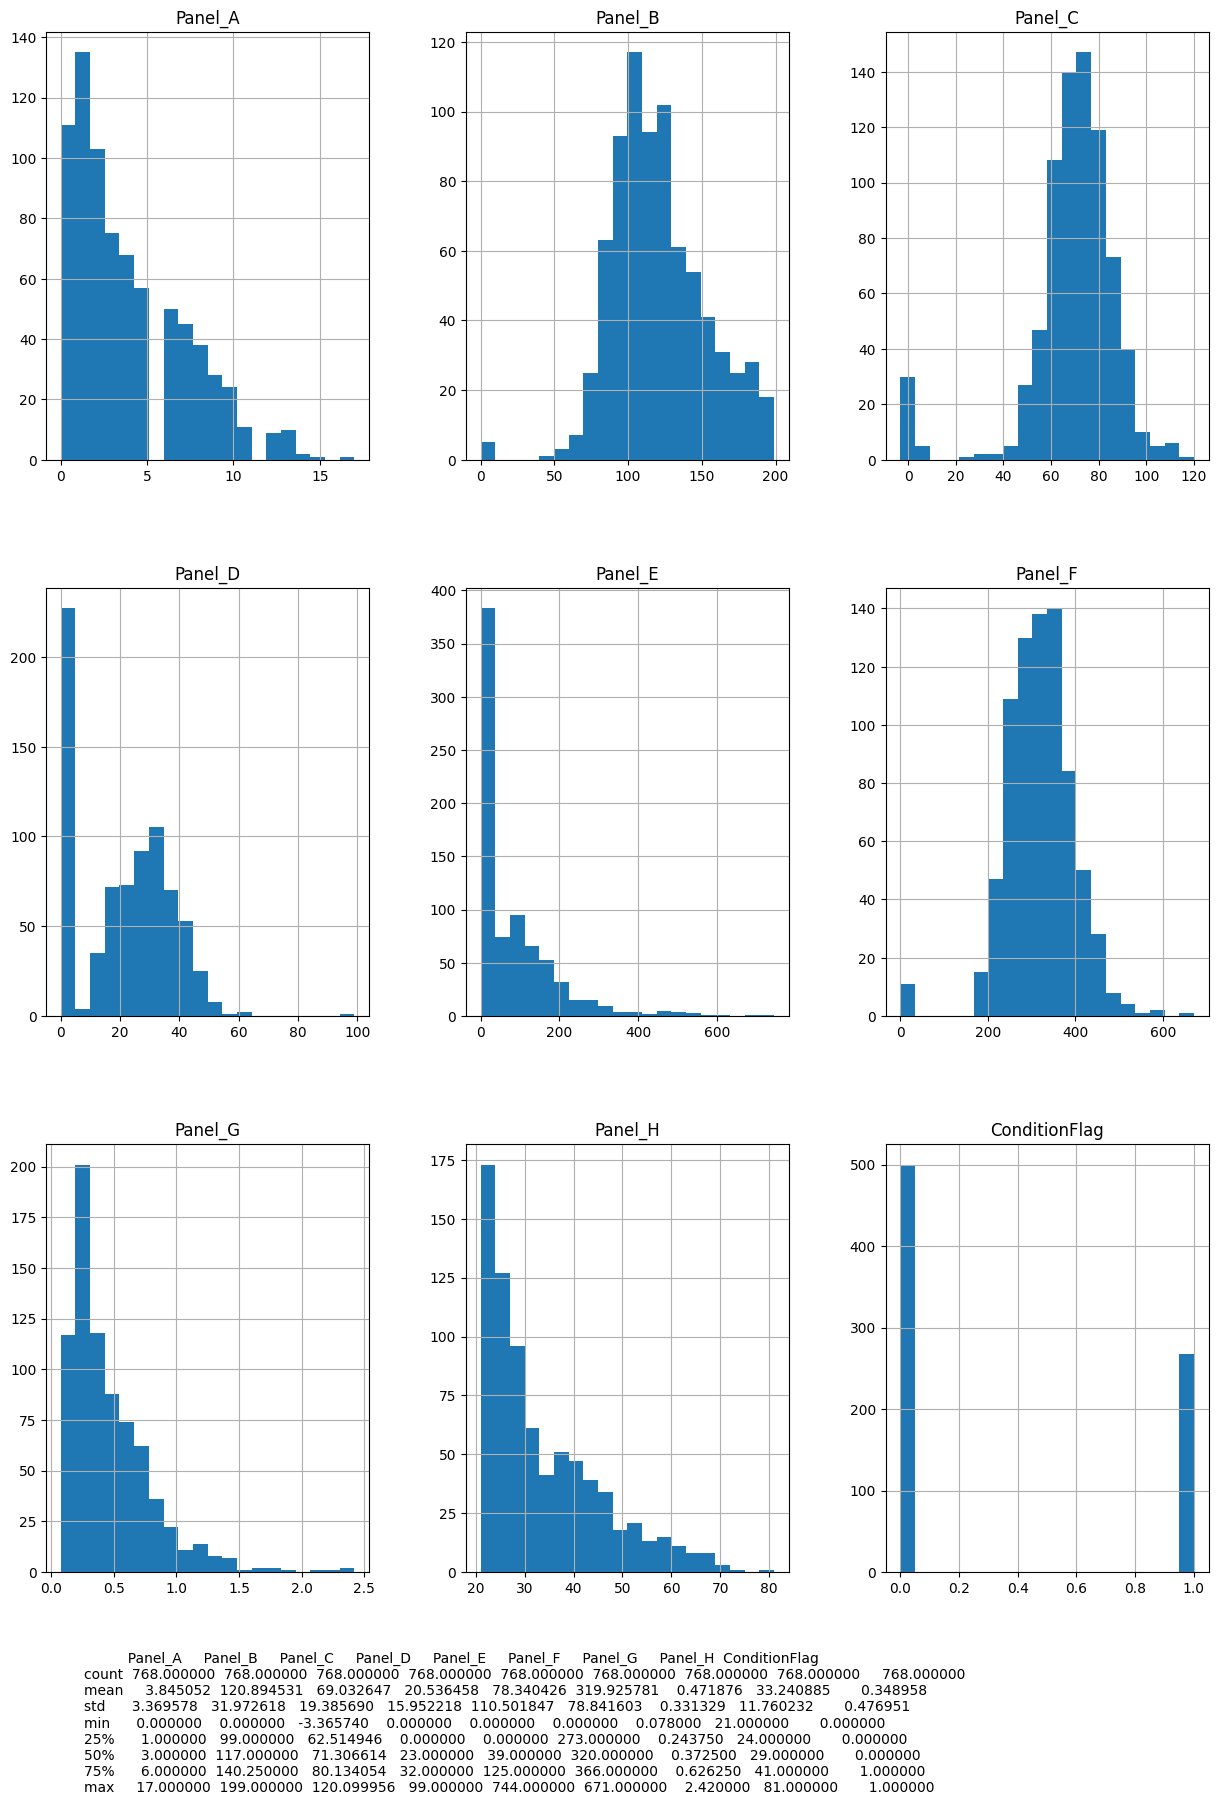

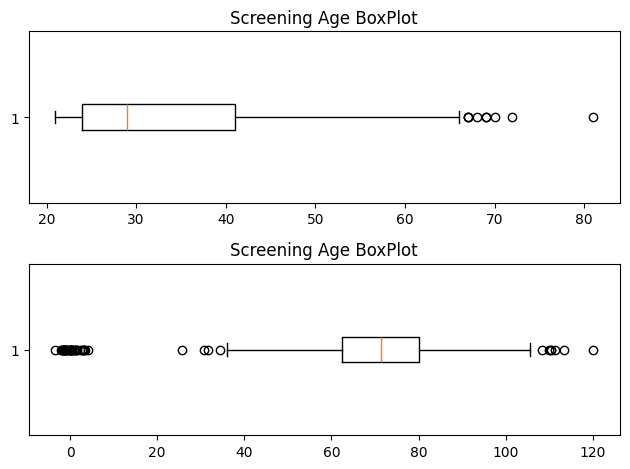

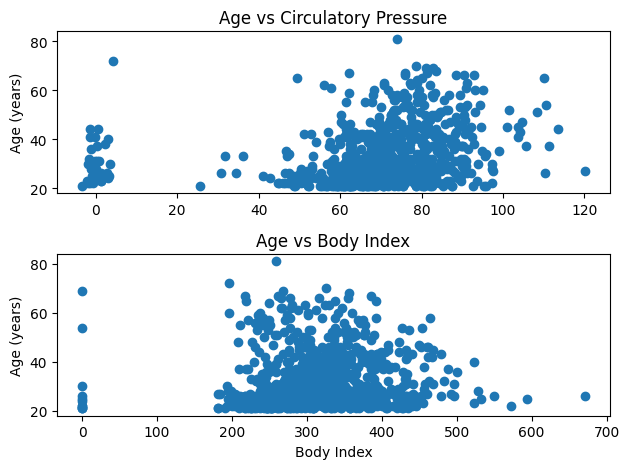

***CrossTab of risk vs body index***
Panel_F  Low  Mid  High
Panel_G                
1         83  396     4
2         25  196     3
3          3   38     0
4          1    4     0
5          0    3     1

***Wellness Features Grouped By Risk Category***
          Panel_A     Panel_B    Panel_C    Panel_D     Panel_E     Panel_F  \
Panel_G                                                                       
1        3.855397  118.474542  68.853267  18.826884   64.044980  313.549898   
2        3.831858  123.022124  68.261633  22.862832  100.149030  328.030973   
3        4.414634  132.707317  76.222648  25.560976  102.821484  346.585366   
4        1.000000  124.166667  66.066803  21.333333   79.833333  271.500000   
5        1.750000  171.750000  65.365145  46.250000  347.750000  444.000000   

          Panel_G    Panel_H  ConditionFlag  
Panel_G                                      
1        0.279122  32.753564       0.289206  
2        0.690938  33.853982       0.429204  
3      

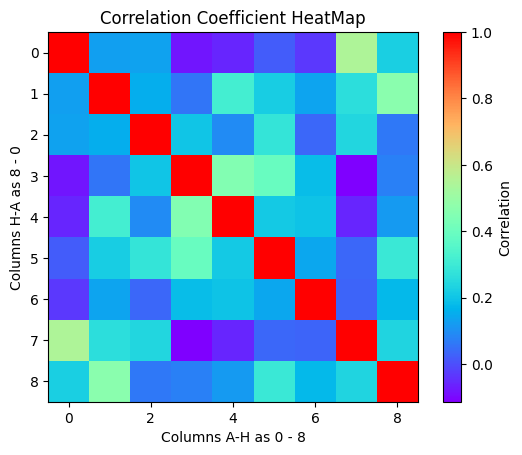

In [ ]:
# Histograms:
wellness.hist(bins=20, figsize=(15, 20))
plt.figtext(0.15, 0, wellness.describe().to_string())
print()
# Panels A, D, G, and H are left-skewed

# Boxplots:
fig, axs = plt.subplots(2)

axs[0].boxplot(wellness['Panel_H'], vert=False)
axs[0].set_title('Screening Age BoxPlot')
# Most patients were between 20 and 45 years old, and there are a lot of high outliers

axs[1].boxplot(wellness['Panel_C'], vert=False)
axs[1].set_title('Screening Age BoxPlot')
# Most patients' blood pressures were between 60 and 80

plt.tight_layout()
plt.show()

# Scatterplots
fig, axs = plt.subplots(2)

axs[0].scatter(wellness['Panel_C'], wellness['Panel_H'])
axs[0].set_title('Age vs Circulatory Pressure')
axs[0].set_xlabel='Circulatory Pressure'
axs[0].set_ylabel('Age (years)')
# Most patients had normal circulatory pressure(between 60 and 80)

axs[1].scatter(wellness['Panel_F'], wellness['Panel_H'])
axs[1].set_title('Age vs Body Index')
axs[1].set_xlabel('Body Index')
axs[1].set_ylabel('Age (years)')
# Most people had a body index between 200 and 400, with some younger people having very high indexes

plt.tight_layout()
plt.show()

# Contingency tables(cross tabulation)
# make bins for this too to make output nice
risk_cat = pd.cut(wellness['Panel_G'], bins=[0, 0.5, 1, 1.5, 2, 2.5], labels=[1, 2, 3, 4, 5])
bindex_cat = pd.cut(wellness['Panel_F'], bins=[0, 250, 500, np.inf], labels=['Low', 'Mid', 'High'])
age_cat = pd.cut(wellness['Panel_H'], bins=[0, 0.5, 1, 1.5, 2, 2.5], labels=[1, 2, 3, 4, 5])

print("***CrossTab of risk vs body index***")
cont_table1 = pd.crosstab(risk_cat, bindex_cat)
print(cont_table1)
print()
# plt.imshow(cont_table1, cmap=plt.get_cmap('jet'), interpolation='nearest')

# Grouped Summary, like the one below but better and shorter

print("***Wellness Features Grouped By Risk Category***")
group_by_cpy = wellness.groupby(risk_cat, observed=False)
print(group_by_cpy.mean())
print()

print("***Wellness Features Grouped By Body Index Category***")
group_by_cpy = wellness.groupby(bindex_cat, observed=False)
print(group_by_cpy.mean())
print()

print("***Correlation Matrix for Wellness Features***")
corr_matrix = wellness.corr(numeric_only=True)
print(corr_matrix)
print()
# Most features have between 0.1 and 0.4 correlation, with
# panels H and A being the most correlated with a correlation of around 0.54

# heatmap for correlation matrix
plt.imshow(corr_matrix, cmap=plt.get_cmap('rainbow'), interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xlabel('Columns A-H as 0 - 8')
plt.ylabel('Columns H-A as 8 - 0')
plt.title('Correlation Coefficient HeatMap')
plt.show()


## 3) Feature engineering

Create at least **2** new features that could be useful for understanding the data (e.g., ratios, bins, interactions, flags).
Explain why each is meaningful.


In [ ]:
# Feature 1: Circulatory pressure points per year
# Knowing the average circulatory pressure per year of patients allows for another way to
# understand how high or low the average patient's circulatory pressure is
wellness["Panel_I"] = wellness['Panel_C']/wellness['Panel_H']
avg_cpress_per_year = round(wellness["Panel_I"].mean(), 3)
avg_cpress = round(wellness['Panel_C'].mean(), 3)

print("***First Five Circulatory Pressure per Year Values***")
print(round(wellness["Panel_I"].head(5), 3))
print()
print(f"Average circulatory pressure of patients: {avg_cpress}")
print(f"Average circulatory pressure per year:  {avg_cpress_per_year}")
print()

# Feature 2: Average number of checkups per year
# Knowing the amount of checkups per year can help to estimate
# wellness factors according to frequency of checkups
wellness["Panel_J"] = wellness['Panel_A']/wellness['Panel_H']
avg_checkups_per_year = round(wellness["Panel_J"].mean(), 3)

print("***First Five Checkups per Year Values***")
print(round(wellness["Panel_J"].head(5), 3))
print()
print(f"Average Number of Checkups per Year: {avg_checkups_per_year}")

# MAYBE ADD BINNING AND GROUP BYS


***First Five Circulatory Pressure per Year Values***
0    1.452
1    2.062
2    2.047
3    3.232
4    1.094
Name: Panel_I, dtype: float64

Average circulatory pressure of patients: 69.033
Average circulatory pressure per year:  2.257

***First Five Checkups per Year Values***
0    0.120
1    0.032
2    0.250
3    0.048
4    0.000
Name: Panel_J, dtype: float64

Average Number of Checkups per Year: 0.108



## 4) Mini-report
---



  Age is a very informative feature, since it provides an efficient method of organizing other patient-related information. Risk factor screening is also an important feature as it is important for analyzing possibilities for the underlying causes of patients' conditions. A surprising pattern in circulatory pressure measurements was that it did not seem to increase by age by any significant amount, which would be expected. This may call into question the quality of the data. Another interesting finding was that younger people had some of the highest body indexes. The most significant correlation between features was between panels H and A, which represented screening age and number of prior health checkups respectively. This correlation was 0.54. The data in this project could be appropriate for a linear model, since all of the features have realtively low correlations between each other. There was a significant amount of outliers in the screening age and tissue thickness measurement data, though there were outliers found in the circulatory pressure and body index values as well. If given more time to work with this data, I would explore ways to better normalize the data in this project, since most of it was skewed and had a lot outliers.



---

## ✅ Grading Rubric (20 points total)

1. **Data loading & cleaning** (4 pts)
2. **Univariate analysis** (3 pts)  
3. **Bivariate & grouping** (4 pts)  
4. **Correlation analysis** (3 pts)  
5. **Feature engineering** (3 pts)  
6. **Clarity & mini-report** (3 pts)